# USING K-MEANS AND PCA tool on Seed categorization (clustering)
Un-supervised ML; only use labelled result for comparaison

In [3]:
import pandas as pd
data = pd.read_csv('datasets/seeds.txt', delim_whitespace=True,header=None)  
print(data.head())

       0      1       2      3      4      5      6  7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1


In [5]:
# separating DATA X and RESULTS Y
X = data.drop(7, axis=1).values # contains measured variables (0 to 6) for clustering (deleting result colomn(7))
Y = data[7].values # separate last column (contains species = answer)
print(X.shape)
print(Y.shape)

(210, 7)
(210,)


In [11]:
# normalizing variables
from sklearn import preprocessing
X_norm = preprocessing.scale(X)

print(X)
print (X_norm)

[[15.26   14.84    0.871  ...  3.312   2.221   5.22  ]
 [14.88   14.57    0.8811 ...  3.333   1.018   4.956 ]
 [14.29   14.09    0.905  ...  3.337   2.699   4.825 ]
 ...
 [13.2    13.66    0.8883 ...  3.232   8.315   5.056 ]
 [11.84   13.21    0.8521 ...  2.836   3.598   5.044 ]
 [12.3    13.34    0.8684 ...  2.974   5.637   5.063 ]]
[[ 1.42097769e-01  2.15462437e-01  6.06017918e-05 ...  1.41701823e-01
  -9.86151745e-01 -3.83577423e-01]
 [ 1.11880257e-02  8.22375713e-03  4.28515270e-01 ...  1.97432229e-01
  -1.78816620e+00 -9.22013487e-01]
 [-1.92066576e-01 -3.60200562e-01  1.44238325e+00 ...  2.08047544e-01
  -6.67479334e-01 -1.18919199e+00]
 ...
 [-5.67570840e-01 -6.90247348e-01  7.33948301e-01 ... -7.06044846e-02
   3.07658816e+00 -7.18060432e-01]
 [-1.03608992e+00 -1.03564515e+00 -8.01701104e-01 ... -1.12152071e+00
  -6.81351965e-02 -7.42534799e-01]
 [-8.77620233e-01 -9.35863561e-01 -1.10234659e-01 ... -7.55292327e-01
   1.29122264e+00 -7.03783718e-01]]


Populating the interactive namespace from numpy and matplotlib


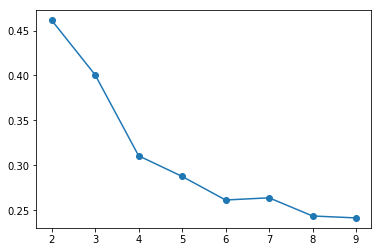

In [14]:
# to plot things : import pylab in the notebook (adds numpy and matplotlib)
%pylab inline 
from sklearn import cluster, metrics # metrics to measure shapes and clustering description

silhouettes = []

# exploration loop for 2 to 10 clusters to determine optimum
for num_clusters in range(2,10) : 
    cls = cluster.KMeans(n_clusters = num_clusters,
                         n_init=1, # number of repetition (to minimise starting point sensibility)
                         init='random') #initialistion aleatoire
    
    cls.fit(X_norm) #compute clustering
    # silhouette coef on normalize data, according to clusters labels
    silh_measure = metrics.silhouette_score(X_norm, cls.labels_) 
    
    #saving coef
    silhouettes.append(silh_measure) 

#graph on silhouette coef per number of clusters
plt.plot(range(2,10), silhouettes, marker='o')

# NOTA : WE SEARCH A HIGH SILHOUETTE COEF
# Here best results are on 2 clusters

In [17]:
# to visualise clusters, use principal component analysis to REDUCE PLOTTING COMPONENTS
from sklearn import decomposition
pca = decomposition.PCA(n_components=2) # init Pca for 2 component
pca.fit(X_norm) # computing PCA

# print quantity of explain variable per principal component
print(pca.explained_variance_ratio_)#.cumcum()) #does not work with np array
X_trans = pca.transform(X_norm) # data Organized by principal components

#NOTA : first component explain 72% of variable ; second component add 17% of variable explanation
# 2 component is enough : 89% of variable is explained

[0.71874303 0.17108184]


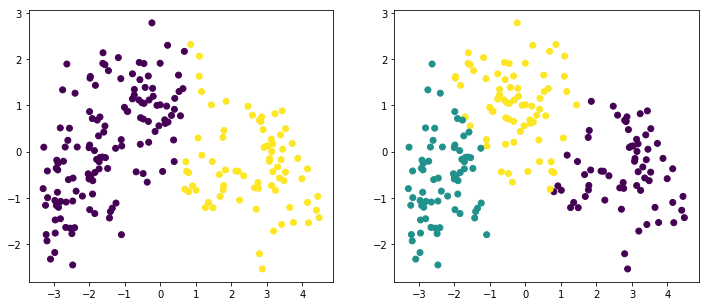

In [19]:
fig = plt.figure(figsize=(12,5))

#first figure computation
cls= cluster.KMeans(n_clusters=2) #for 2 clusters
cls.fit(X_norm) # clusters computing 
ax= fig.add_subplot(121) #spacial positionning into fig
# projecting data with x:first component and y:second component
# colouring with clusters label
ax.scatter(X_trans[:,0], X_trans[:,1], c=cls.labels_) 

#second figure computation
cls3= cluster.KMeans(n_clusters=3) #for 3 clusters
cls3.fit(X_norm) # clusters computing 
ax= fig.add_subplot(122) #spacial positionning into fig
ax.scatter(X_trans[:,0], X_trans[:,1], c=cls3.labels_)

#NOTA : The right cluster is pretty much the same between 2clusters and 3 clusters
# the main effect of the 3cluster option is to separate the first group in 2

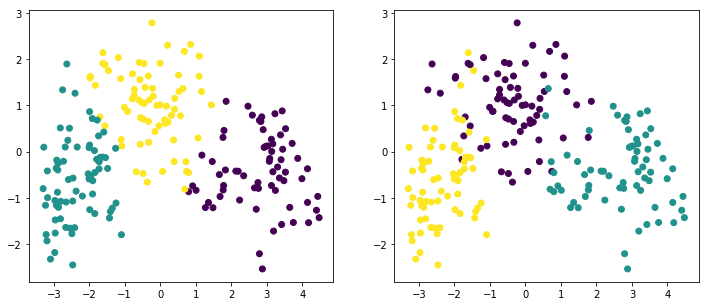

In [20]:
# comparing the clustering results with the real results
# in results, there is 3 type on grain
fig = plt.figure(figsize=(12,5))

#3 cluster figure computation
ax= fig.add_subplot(121) #spacial positionning into fig
ax.scatter(X_trans[:,0], X_trans[:,1], c=cls3.labels_)

# real result figure computation 
ax= fig.add_subplot(122) #spacial positionning into fig
#projecting data with x:first component and y:second component
# colouring with the Y table (contain result column)
ax.scatter(X_trans[:,0], X_trans[:,1], c=Y)

# NOTA graphs must be pretty similar

In [23]:
# measure of perfomance
print(metrics.adjusted_rand_score(Y, cls3.labels_)) # percentage of right answer of clusters label, compare to real results
# nota : perfect is 1

0.7732937360806309
